In [ ]:
Nguyễn Thái Bình - 19146050 - Nhóm 02CLC - 11_Money

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
trainset='/content/drive/MyDrive/11_Money_data/train'
validationset='/content/drive/MyDrive/11_Money_data/validation'
train=ImageDataGenerator(rescale=1/255.0,validation_split=0.1)
validation=ImageDataGenerator(rescale=1/255.0,validation_split=0.9)

In [ ]:
train_data=train.flow_from_directory(trainset,target_size=(150,150),batch_size=10,class_mode='categorical',subset="training",shuffle=True,)
validation_set=validation.flow_from_directory(validationset,target_size=(150,150),batch_size=10,class_mode='categorical',shuffle=True,subset="validation",)

Found 312 images belonging to 11 classes.
Found 80 images belonging to 11 classes.


In [ ]:
print(train_data.class_indices)
print(validation_set.class_indices)

{'0.2k': 0, '0.5k': 1, '100k': 2, '10k': 3, '1k': 4, '200k': 5, '20k': 6, '2k': 7, '500k': 8, '50k': 9, '5k': 10}
{'0.2k': 0, '0.5k': 1, '100k': 2, '10k': 3, '1k': 4, '200k': 5, '20k': 6, '2k': 7, '500k': 8, '50k': 9, '5k': 10}


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(11,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
history=model.fit(train_data,batch_size=10,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
32/32 [==============================] - 23s 698ms/step - loss: 0.5773 - accuracy: 0.8494 - val_loss: 3.0185 - val_accuracy: 0.6500
Epoch 2/30
32/32 [==============================] - 21s 641ms/step - loss: 0.2256 - accuracy: 0.9135 - val_loss: 3.2612 - val_accuracy: 0.6750
Epoch 3/30
32/32 [==============================] - 21s 646ms/step - loss: 0.1396 - accuracy: 0.9583 - val_loss: 4.2123 - val_accuracy: 0.5375
Epoch 4/30
32/32 [==============================] - 21s 646ms/step - loss: 0.0995 - accuracy: 0.9679 - val_loss: 3.8236 - val_accuracy: 0.6250
Epoch 5/30
32/32 [==============================] - 21s 645ms/step - loss: 0.1982 - accuracy: 0.9551 - val_loss: 4.0658 - val_accuracy: 0.6250
Epoch 6/30
32/32 [==============================] - 21s 646ms/step - loss: 0.0940 - accuracy: 0.9776 - val_loss: 3.4869 - val_accuracy: 0.7000
Epoch 7/30
32/32 [==============================] - 21s 647ms/step - loss: 0.0928 - accuracy: 0.9744 - val_loss: 6.5983 - val_accuracy: 0.6250

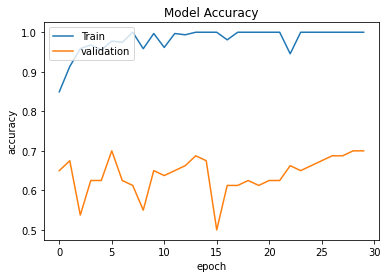

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/BT AI/11_Money.h5')

In [ ]:
load_model('/content/drive/MyDrive/BT AI/11_Money.h5')

Found 17 images belonging to 1 classes.


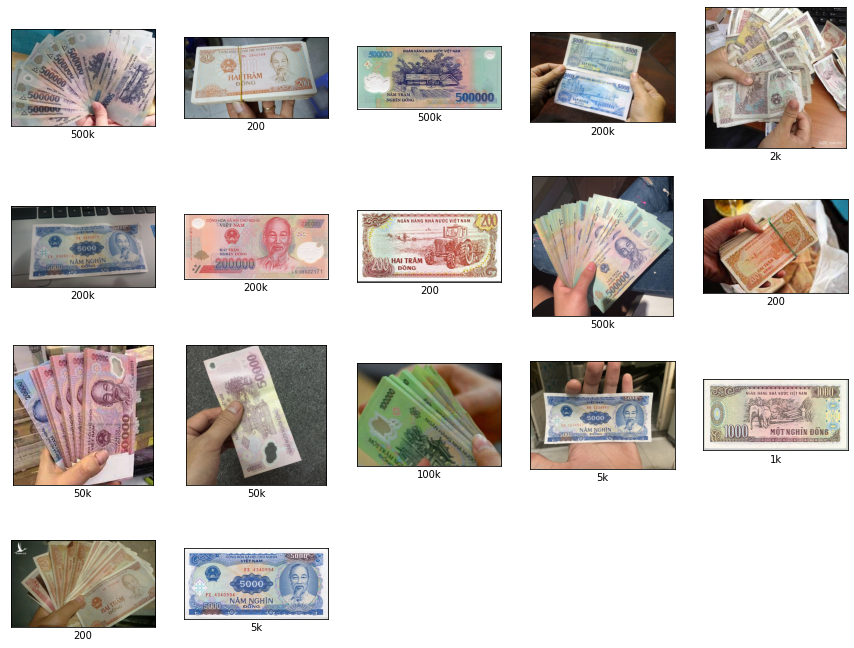

In [118]:
generator= ImageDataGenerator(rescale=1./255)
generator_data=generator.flow_from_directory('/content/drive/MyDrive/Test money',batch_size=5,shuffle=False,interpolation='lanczos')

money={0:'200',
      1:'500',
      2:'100k',
      3:'10k',
      4:'1k',
      5:'200k',
      6:'20k',
      7:'2k',
      8:'500k',
      9:'50k',
      10:'5k'}
  
plt.figure(figsize=(15,15))
for i in range(len(generator_data.filenames)):
    plt.subplot(5,5,i+1)
    plt.imshow(io.imread(os.path.join(generator_data.directory,generator_data.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('/content/drive/MyDrive/Test money/'+generator_data.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img=img/255
    plt.xlabel(money[np.argmax(model.predict(img))]) 
plt.show()